# Hierarchical Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
Targ='tds'

In [3]:
dataset = pd.read_csv('tds.csv')
dataset.head()

,t,sta,ec_mtz,ec_sac,ec_sjr,ec_east,ec_ag,ec,tds,vol
0,3/20/1990,Banks PP,193,152,10.48,6,79.37,445.0,250.0,440.85
1,4/18/1990,Banks PP,520,155,7.75,4,59.34,706.0,375.0,746.09
2,5/15/1990,Banks PP,381,132,31.47,3,70.67,698.0,385.0,618.14
3,6/19/1990,Banks PP,254,126,27.14,6,108.10,615.0,350.0,521.24
4,7/18/1990,Banks PP,242,150,6.70,2,99.73,385.0,218.0,500.43


In [4]:
dataset = pd.read_csv("tds.csv")
x = dataset[['ec_mtz','ec_sac','ec_sjr','ec_east','ec_ag','ec',Targ]]
#x = dataset[['ec',Targ]]

x = pd.DataFrame(x)

In [5]:
x.head()

,ec_mtz,ec_sac,ec_sjr,ec_east,ec_ag,ec,tds
0,193,152,10.48,6,79.37,445.0,250.0
1,520,155,7.75,4,59.34,706.0,375.0
2,381,132,31.47,3,70.67,698.0,385.0
3,254,126,27.14,6,108.10,615.0,350.0
4,242,150,6.70,2,99.73,385.0,218.0


## Using the dendrogram to find the optimal number of clusters

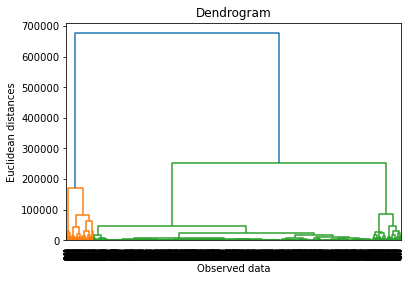

In [7]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Observed data')
plt.ylabel('Euclidean distances')
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [0]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

## Visualising the clusters

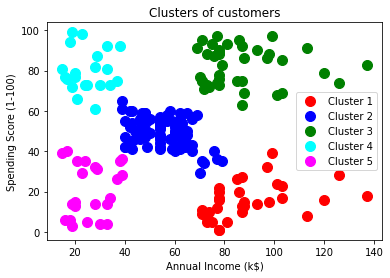

In [5]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()